In [1]:
import anndata
import numpy as np
import scipy as sp
import scvelo as scv
import scanpy as sc
import sys
import pandas as pd
import torch
import os.path
sys.path.append('../../')
import topovelo as tpv
import matplotlib.pyplot as plt
from scipy.io import mmread, mmwrite
from numpy import savetxt
%load_ext autoreload
%autoreload 2

In [2]:
root = '/nfs/turbo/umms-welchjd/jialin/cytosignal_proj/slide-seq/adult_cortex'
dataset = 'slide-seq-adult-cortex'
data_path_base = f'/nfs/turbo/umms-welchjd/yichen/data/TopoVelo/{dataset}'
figure_path = '/nfs/turbo/umms-welchjd/yichen/figures/TopoVelo/brain_cortex'
model_path = f'/scratch/welchjd_root/welchjd/shared_data/gyichen/checkpoints/{dataset}'

In [3]:
graph = mmread(f'{root}/DT_nn_graph.mtx').tocsr().T

In [4]:
adata = anndata.read_h5ad(f'{data_path_base}/adata_out.h5ad')

saving figure to file /nfs/turbo/umms-welchjd/yichen/figures/TopoVelo/brain_cortex/brain_cortex_spatial.pdf


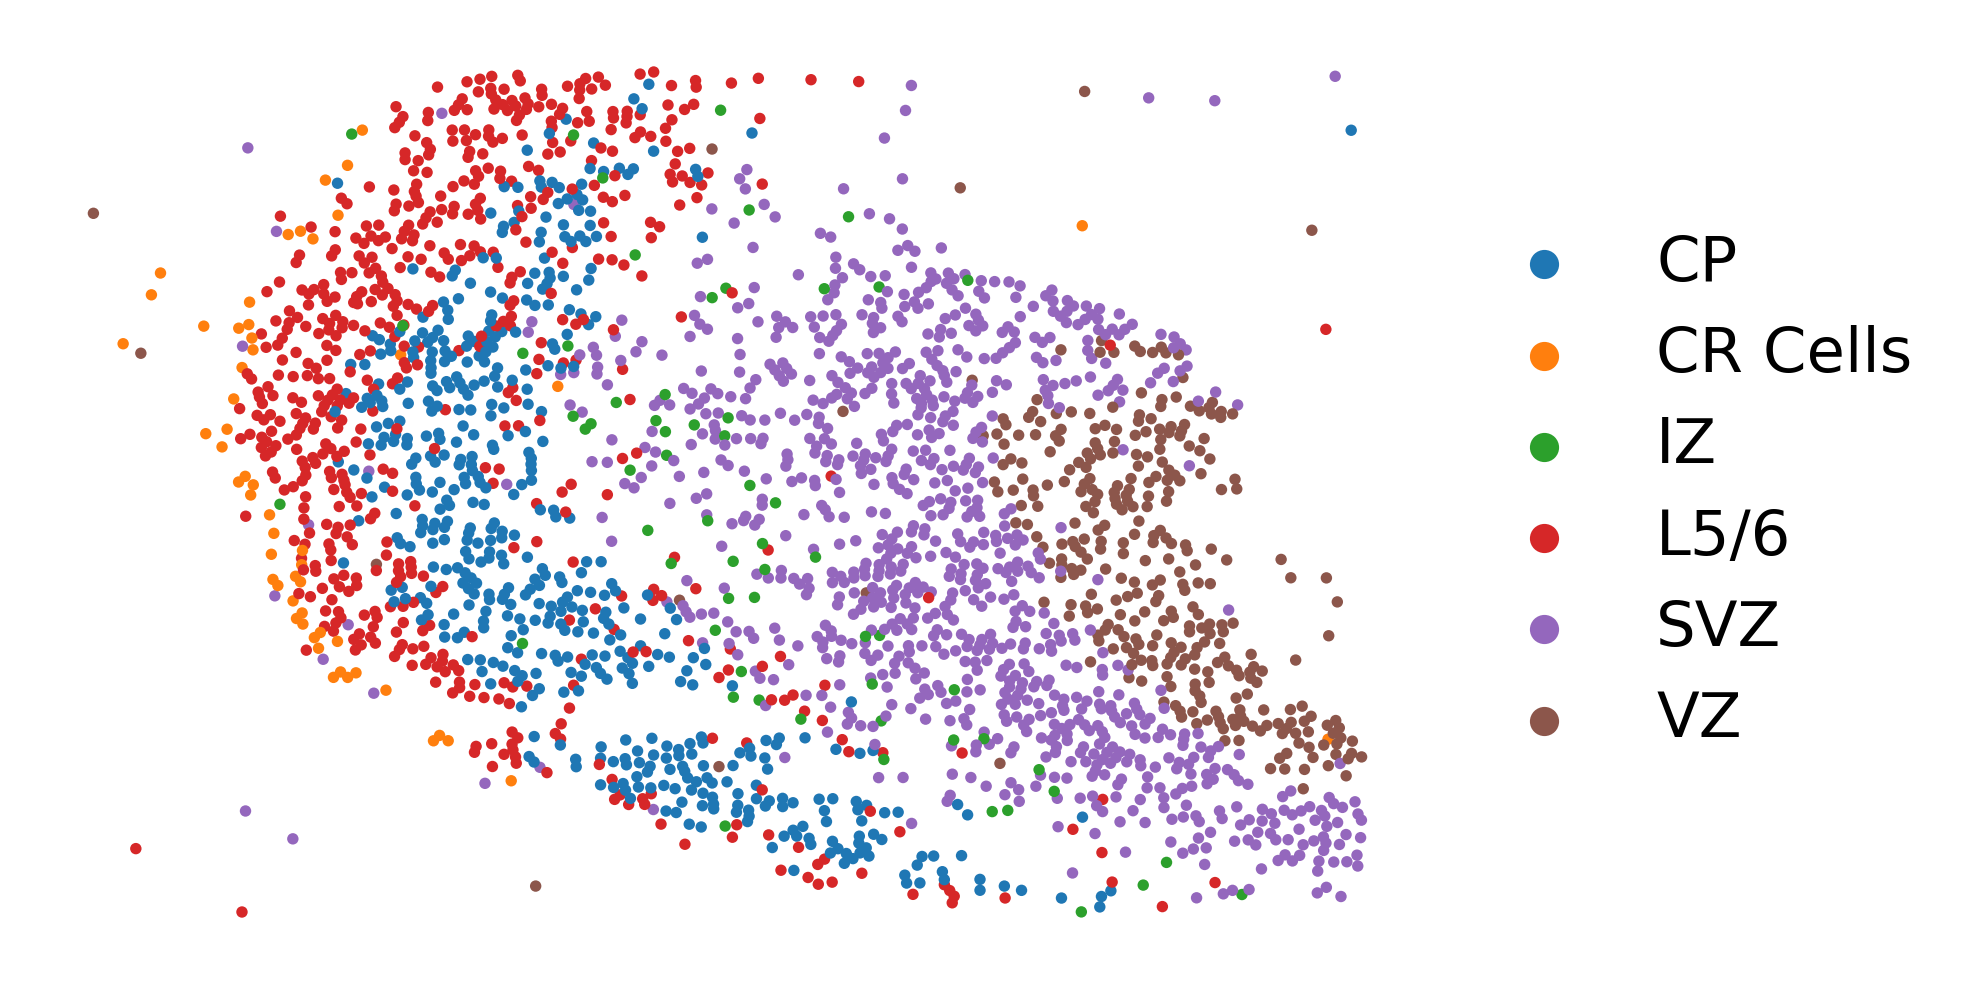

In [8]:
scv.pl.scatter(adata, basis='pos', title='',
               legend_loc='right margin',
               figsize=(6, 4),
               size=30,
               legend_fontsize=15,
               dpi=300,
               save=f'{figure_path}/brain_cortex_spatial.pdf')

In [5]:
vel_genes = adata.var_names[adata.var['velocity_genes'].to_numpy()]
print("Number of velocity genes: ", len(vel_genes))

Number of velocity genes:  83


Computing a spatial graph using KNN on X_pos with k=30
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
---   Plotting  Results   ---
computing velocity graph (using 1/32 cores)


  0%|          | 0/2525 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pos', embedded velocity vectors (adata.obsm)
saving figure to file /nfs/turbo/umms-welchjd/yichen/figures/TopoVelo/brain_cortex/main_brain_fit.png


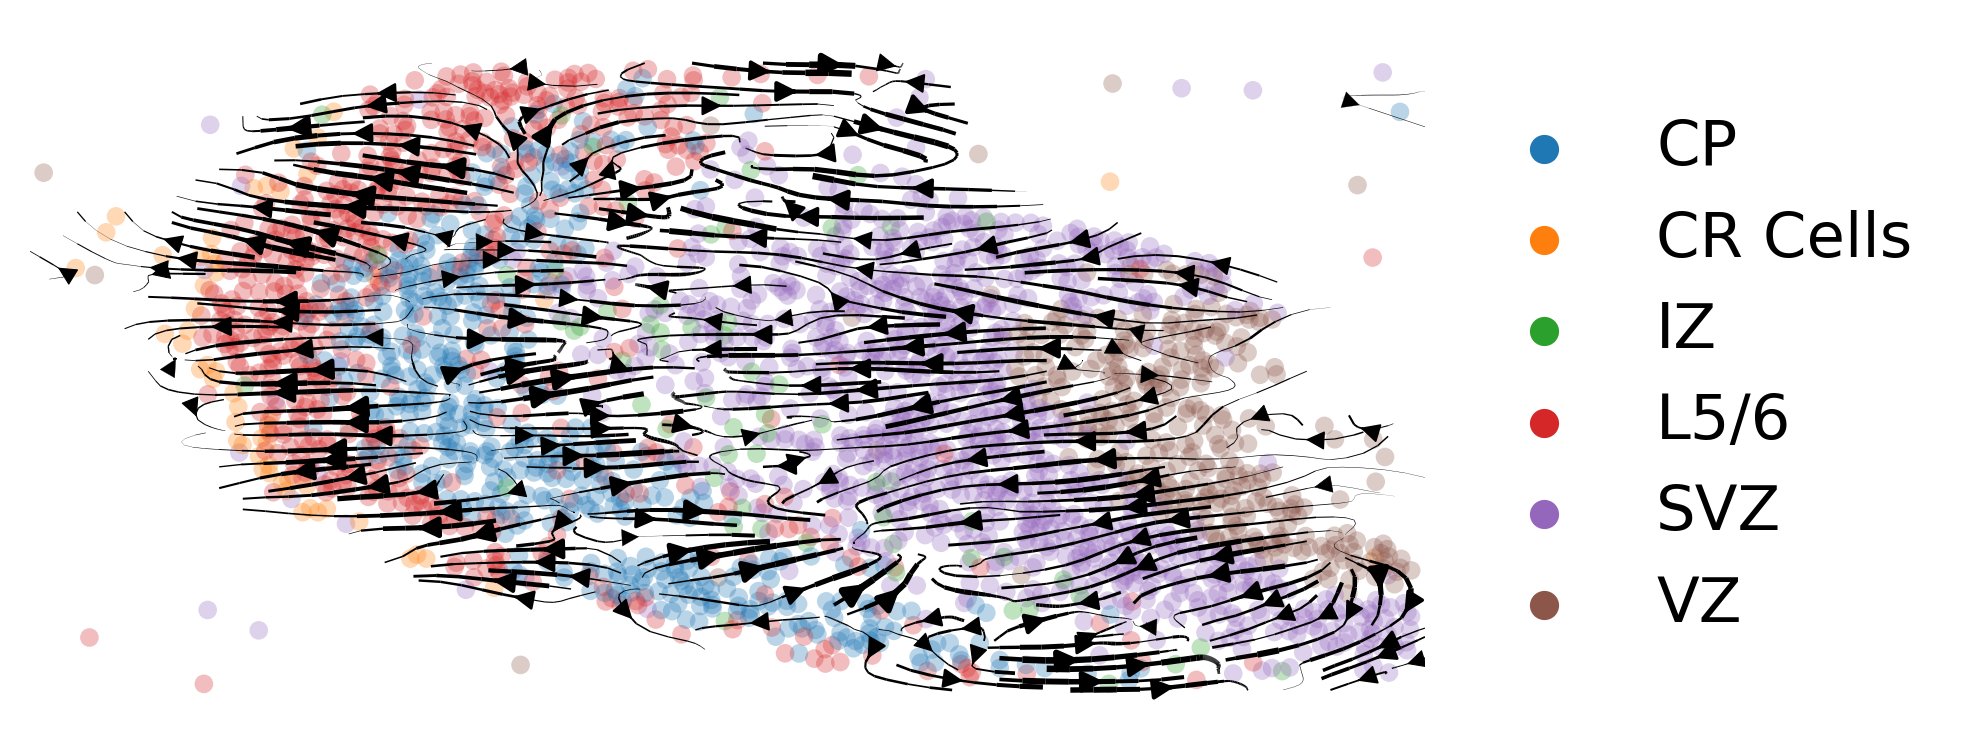

computing velocity graph (using 1/32 cores)


  0%|          | 0/2525 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'fullvb_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'fullvb_velocity_pos', embedded velocity vectors (adata.obsm)
saving figure to file /nfs/turbo/umms-welchjd/yichen/figures/TopoVelo/brain_cortex/main_brain_fullvb.png


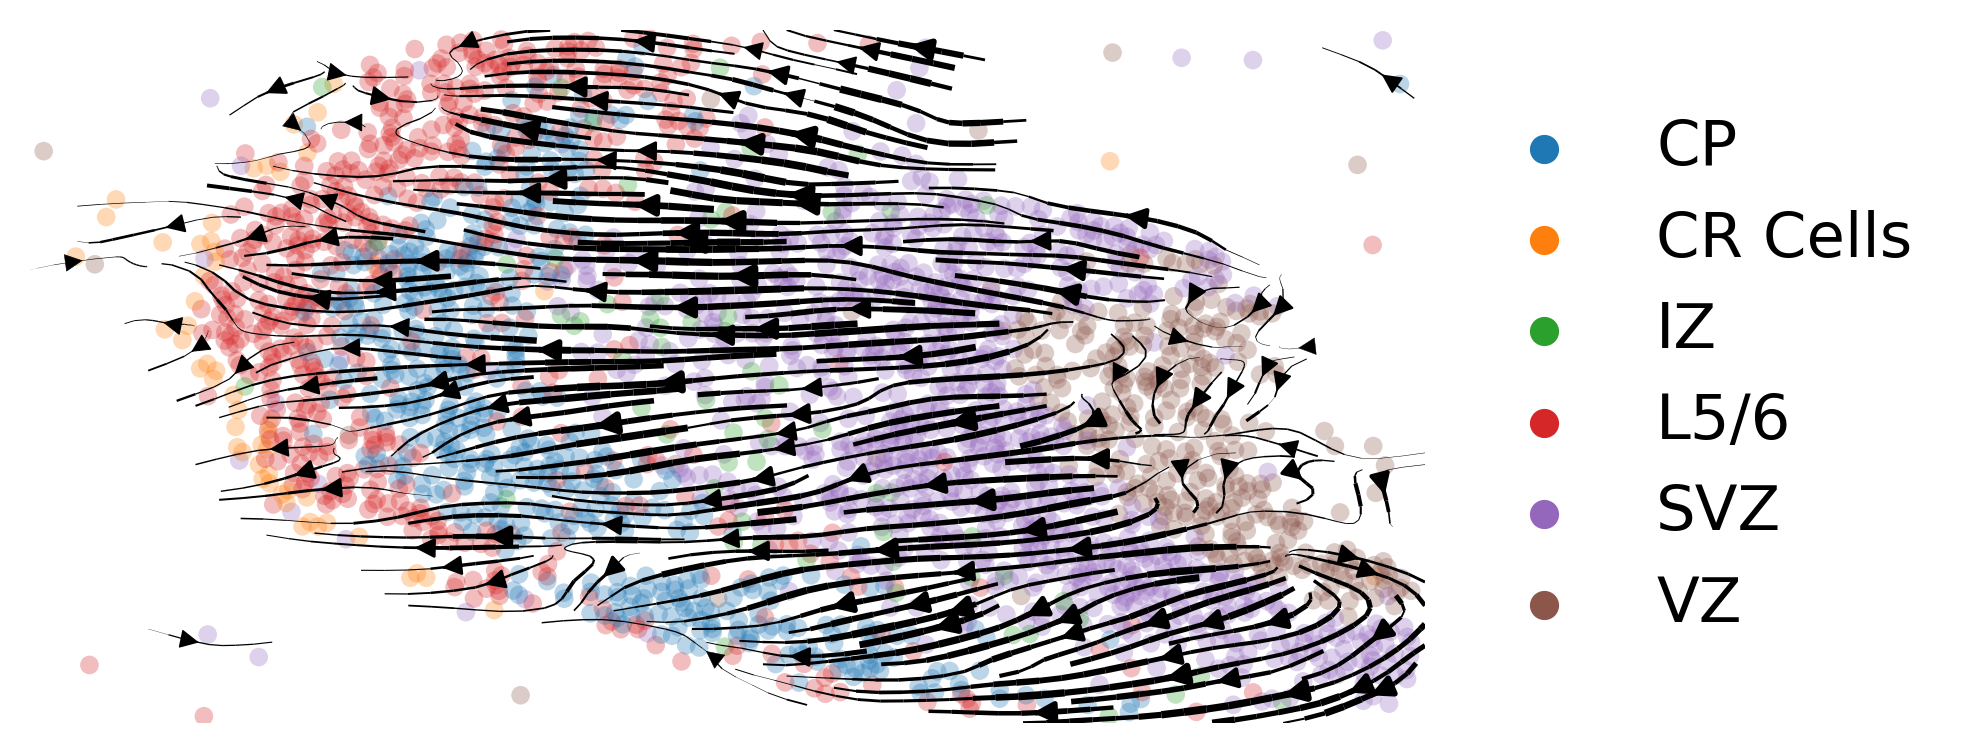

computing velocity graph (using 1/32 cores)


  0%|          | 0/2525 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'gat_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'gat_velocity_pos', embedded velocity vectors (adata.obsm)
saving figure to file /nfs/turbo/umms-welchjd/yichen/figures/TopoVelo/brain_cortex/main_brain_gat.png


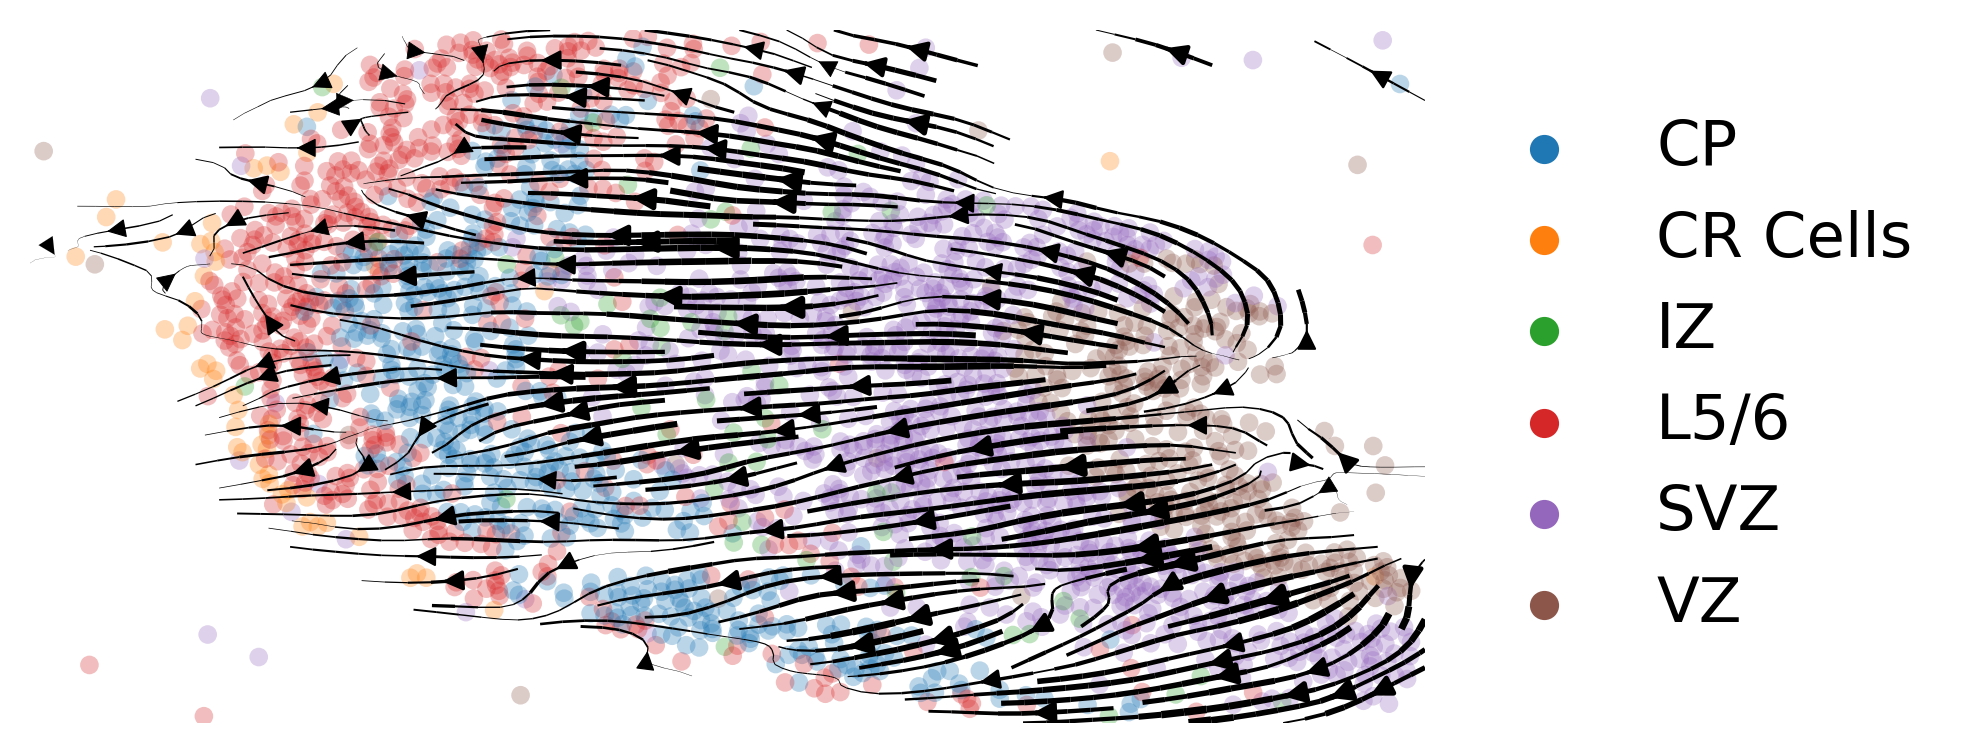

saving figure to file /nfs/turbo/umms-welchjd/yichen/figures/TopoVelo/brain_cortex/main_brain_gat_true_velocity.png


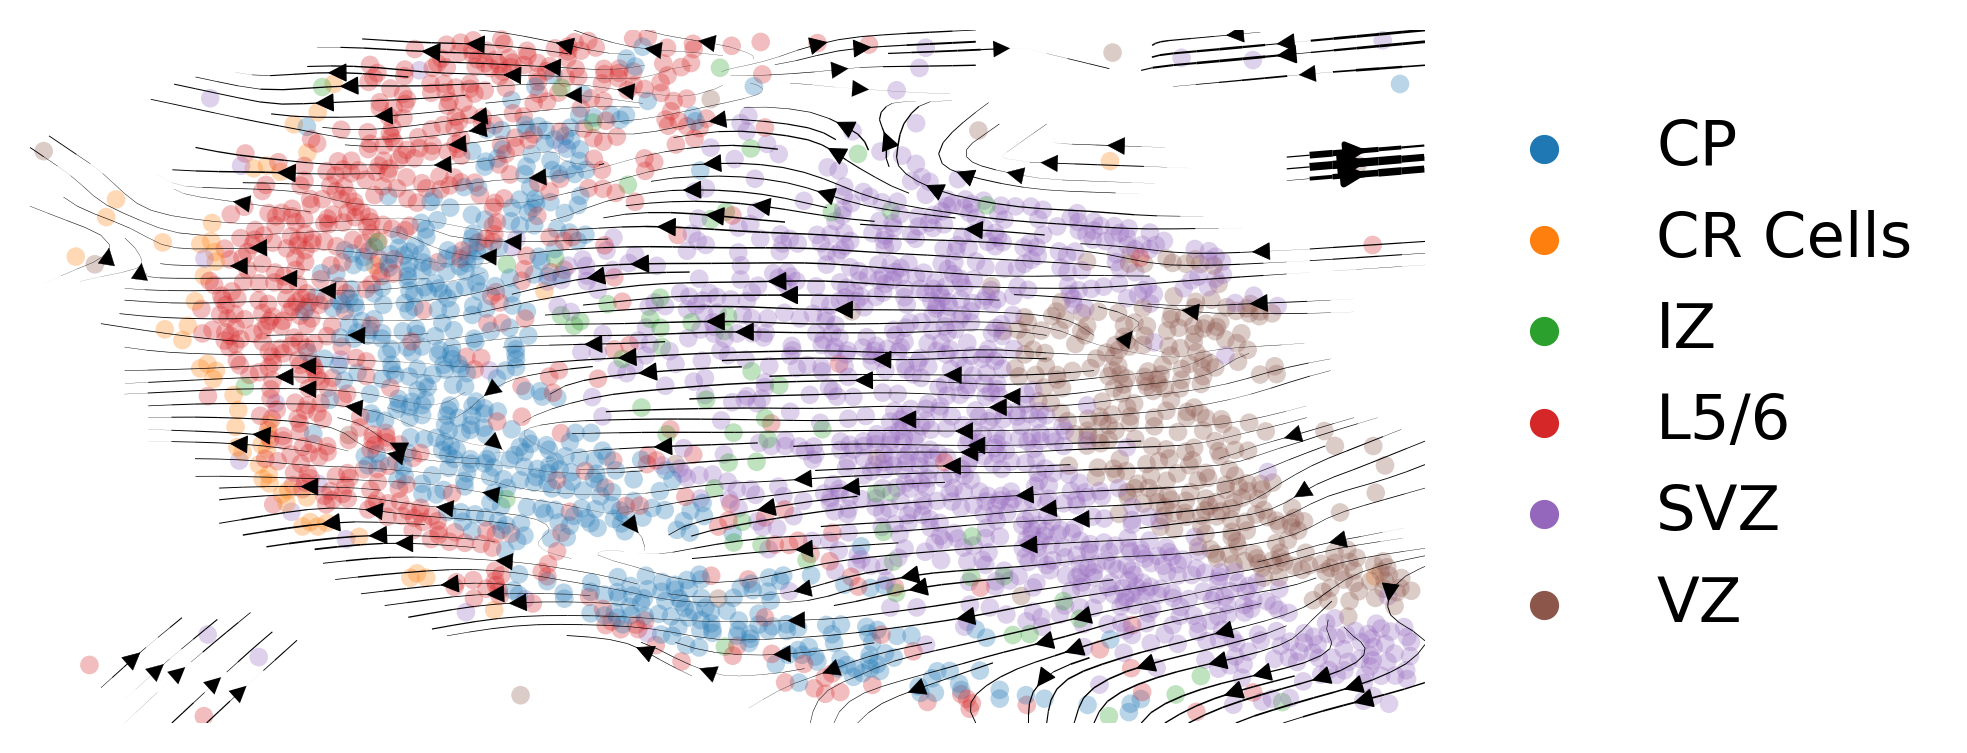

In [6]:
tpv.plotting.set_dpi(300)
adata.obsp['spatial_graph'] = graph
vel_genes = adata.var_names[adata.var["velocity_genes"].to_numpy()]
genes = np.random.choice(vel_genes, 4)
methods = ['scVelo', 'VeloVAE', 'VeloVAE (Full VB)', 'TopoVelo (GCN)', 'TopoVelo (GAT)']
keys = ['fit', 'vv', 'fullvb', 'tpv', 'gat']
_, _, _, _ = tpv.post_analysis(adata,
                               'main_brain',
                               ['scVelo', 'VeloVAE (Rate Prior)', 'TopoVelo (GAT)'],
                               ['fit', 'fullvb', 'gat'],
                               spatial_key='X_pos',
                               spatial_graph_key='spatial_graph',
                               spatial_velocity_graph=True,
                               n_spatial_neighbors=30,
                               compute_metrics=False,
                               genes=genes,
                               embed='pos',
                               plot_type=['stream'],
                               figure_path=figure_path,
                               sparsity_correction=True,
                               stream_figsize=(6, 3),
                               dot_size=80,
                               dpi=300,
                               stream_legend_loc='right margin',
                               save_format='png')

['Map2']
---   Plotting  Results   ---


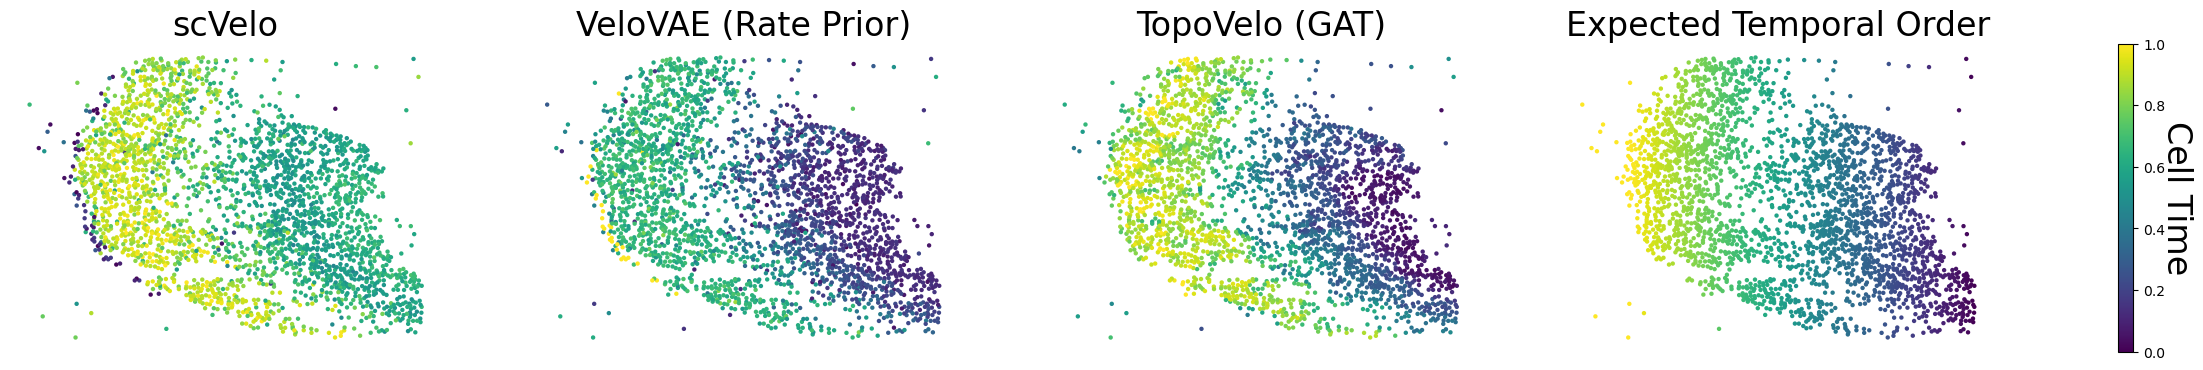

In [9]:
_, _, _, _ = tpv.post_analysis(adata,
                               'main_brain',
                               ['scVelo', 'VeloVAE (Rate Prior)', 'TopoVelo (GAT)'],
                               ['fit', 'fullvb', 'gat'],
                               spatial_key='X_pos',
                               spatial_graph_key='spatial_graph',
                               spatial_velocity_graph=True,
                               num_spatial_neighbors=16,
                               compute_metrics=False,
                               grid_size=(1, 1),
                               embed='pos',
                               plot_type=['time'],
                               figure_path=figure_path,
                               sparsity_correction=True,
                               dpi=300,
                               dot_size=10,
                               time_colormap='viridis',
                               stream_legend_loc='right_margin',
                               save_format='pdf')